<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.dummy import DummyRegressor
from scipy import stats as st
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Данные обучающая выборка

In [2]:
data_train.shape

(14149, 87)

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
data_test.shape

(5290, 53)

In [6]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
data_full.shape

(19439, 87)

In [9]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Проверим, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. 

In [11]:
data_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [12]:
target_dt=data_train['rougher.output.recovery']
target_dt.describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [13]:
def recovery(data):
    c= data['rougher.output.concentrate_au'].dropna()
    f= data['rougher.input.feed_au'].dropna()
    t= data['rougher.output.tail_au'].dropna()
    r= (c*(f[(f>0)]-t))/(f[(f>0)]*(c-t))*100
    
    data['recovery']=abs(r[(r >= 0) & (r <= 100)])

In [14]:
recovery(data_train)

In [15]:
data_train['recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: recovery, dtype: float64

In [16]:
predict_dt=data_train['recovery'].dropna()
predict_dt.isna().sum()

0

In [17]:
target_dt = target_dt.dropna(0)
target_dt.isna().sum()

0

Найдем MAE между нашими расчётами и значением признака.

In [18]:
def mae(target,predict):
    error=0
    for i in range(target.shape[0]):
        error += abs(target[i] - predict[i])
        y = (error/(target.shape[0]))
        return y

In [19]:
target_dt.shape[0]

14149

In [20]:
predict_dt.shape[0]

14149

In [21]:
mae(target_dt,predict_dt)

0.0

Найдём MAE при помощи функции mean_absolute_error из библиотеки sklearn

In [22]:
mean_absolute_error(target_dt,predict_dt).round(4)

0.0

# Вывод

Значения по эффективности обогащения рассчитана правильно, результат работы нашей формулы проверили методом MAE по формуле и закрепили результат c применением библиотеки sklearn.metrics

 Проанализируем признаки, недоступные в тестовой выборке.

In [23]:
pd.Series(data_train.columns)

0                                           date
1                    final.output.concentrate_ag
2                    final.output.concentrate_pb
3                   final.output.concentrate_sol
4                    final.output.concentrate_au
                         ...                    
83      secondary_cleaner.state.floatbank5_b_air
84    secondary_cleaner.state.floatbank5_b_level
85      secondary_cleaner.state.floatbank6_a_air
86    secondary_cleaner.state.floatbank6_a_level
87                                      recovery
Length: 88, dtype: object

In [24]:
pd.Series(data_test.columns)

0                                           date
1                  primary_cleaner.input.sulfate
2               primary_cleaner.input.depressant
3                primary_cleaner.input.feed_size
4                 primary_cleaner.input.xanthate
5         primary_cleaner.state.floatbank8_a_air
6       primary_cleaner.state.floatbank8_a_level
7         primary_cleaner.state.floatbank8_b_air
8       primary_cleaner.state.floatbank8_b_level
9         primary_cleaner.state.floatbank8_c_air
10      primary_cleaner.state.floatbank8_c_level
11        primary_cleaner.state.floatbank8_d_air
12      primary_cleaner.state.floatbank8_d_level
13                         rougher.input.feed_ag
14                         rougher.input.feed_pb
15                       rougher.input.feed_rate
16                       rougher.input.feed_size
17                        rougher.input.feed_sol
18                         rougher.input.feed_au
19             rougher.input.floatbank10_sulfate
20            roughe

In [25]:
col_drop=data_train.drop(data_test.columns,axis=1)

Выведем названия столбцов, которых нет в тестовой выборке

In [26]:
pd.Series(col_drop.columns)

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

Тип данных в параметрах object

Проведём предобработку данных

Приведём столбцы с датой в соответствующий формат

In [27]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

Заполняем в наших выборках пропуски методом fillna(method=‘ffill’) и удалим пропуски в целевых столбцах

In [28]:
data_test=data_test.fillna(method='ffill')

In [29]:
data_train=data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])
data_train=data_train.fillna(method='ffill')

In [30]:
data_full=data_full.dropna(subset=['rougher.output.recovery','final.output.recovery'])
data_full=data_full.fillna(method='ffill')

In [31]:
dt_mud_full = data_full[['date','rougher.output.recovery','final.output.recovery']]
data_test = data_test.merge(dt_mud_full, on='date', how='left')
data_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213


из выборки data_train – удаляем все лишние столбцы которых нет в тестовой выборке

In [32]:
data_train=data_train[data_test.columns]

Проверим распределение размеров наших таблиц с данными

In [33]:
print(data_train.shape)
print(data_test.shape)

(14149, 55)
(5290, 55)


В тестовой выборке нет признаков по этапам rougher ,primary_cleaner, secondary_cleaner, final и по типу output. Соответственно мы их удаляем и из тренировочной выборке, т.к. мы ориентируемся на тестовые данные, т.к. они появляются на определённом этапе производства и именно на таких данных должна обучаться модель для качественного предсказания значений.
Определены так же целевые признаки - rougher.output.recovery,final.output.recovery

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [34]:
data_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Концентрация на входе

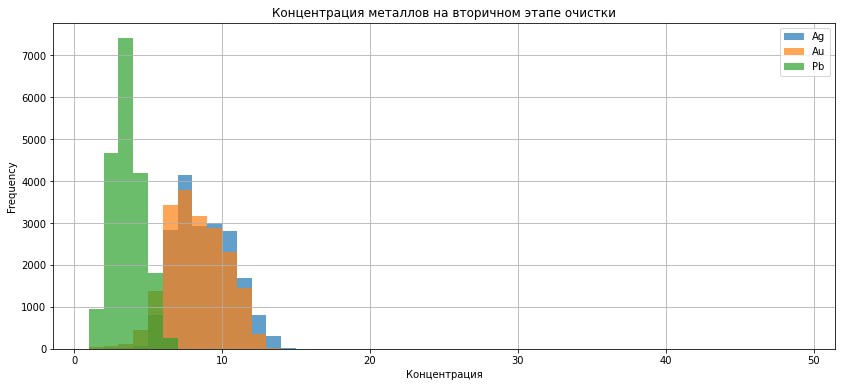

In [35]:
plt.figure(figsize=(14,6))
data_full['rougher.input.feed_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.input.feed_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.input.feed_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на вторичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

Черновой этап

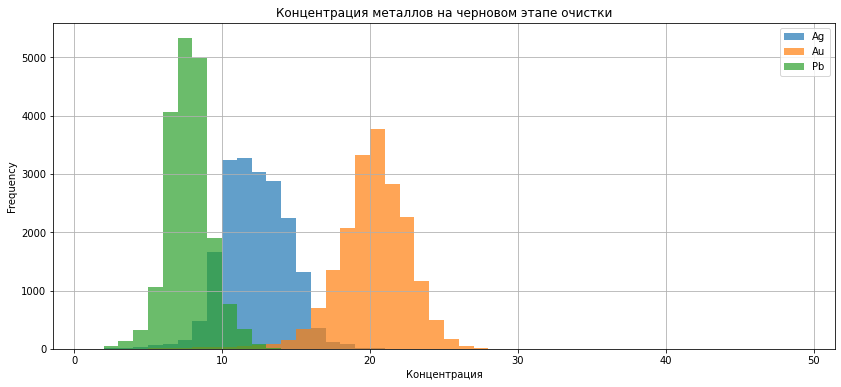

In [36]:
plt.figure(figsize=(14,6))
data_full['rougher.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['rougher.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на черновом этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

Первичный этап очистки

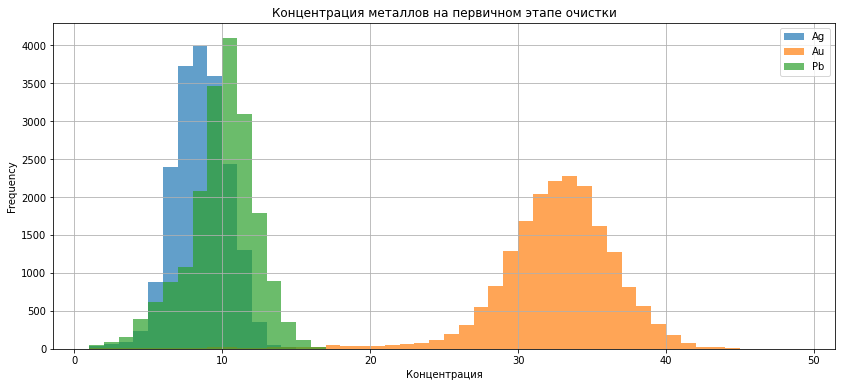

In [37]:
plt.figure(figsize=(14,6))
data_full['primary_cleaner.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['primary_cleaner.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['primary_cleaner.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на первичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

Вторичный этап очитски

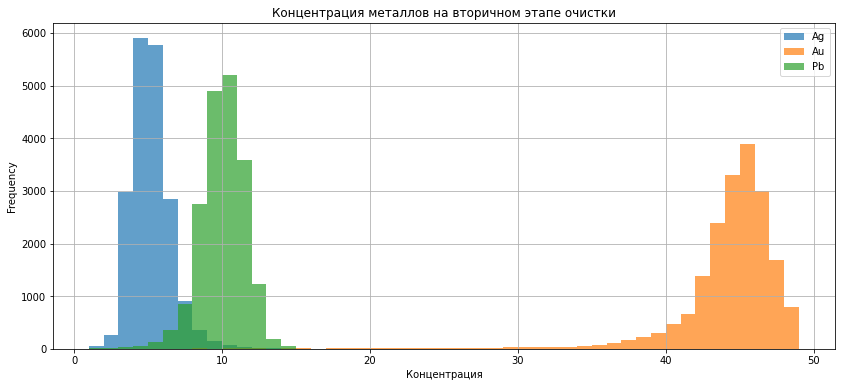

In [38]:
plt.figure(figsize=(14,6))
data_full['final.output.concentrate_ag'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['final.output.concentrate_au'].plot.hist(bins=range(1,50), alpha=0.7)
data_full['final.output.concentrate_pb'].plot.hist(bins=range(1,50), alpha=0.7)
plt.legend(['Ag', 'Au', 'Pb'])
plt.title('Концентрация металлов на вторичном этапе очистки')
plt.xlabel('Концентрация')
plt.grid(True)
plt.show()

По результату анализа мы видим, что с этапами обработки увеличивается концентрация золота, а концентрации серебра и синца снижаются

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

In [39]:
def compare_train_test_features(features):
    plt.figure(figsize=(14,6))
    (data_train[features]).plot.kde(linewidth=3,alpha=0.7)
    (data_test[features]).plot.kde(linewidth=3, alpha=0.7)
    plt.legend(['Тренировочная выборка','Тестовая выборка'])
    plt.title('Распределение размеров гранул на обучающей и тестовой выборках')
    plt.xlabel('Размер гранул')
    plt.grid(True)
    plt.show()

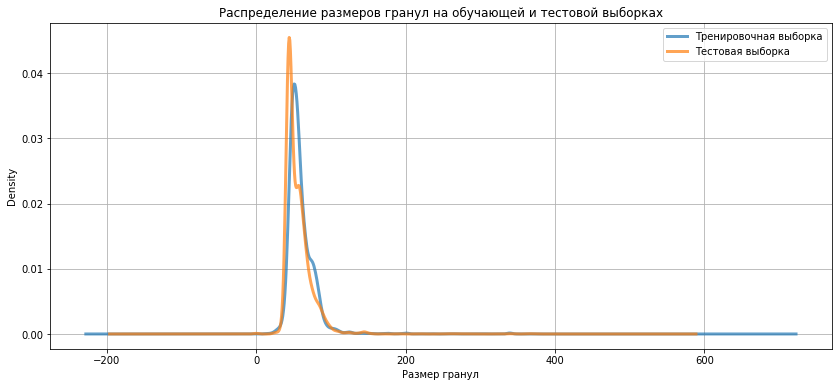

In [40]:
compare_train_test_features('rougher.input.feed_size')

Распределение гранул по двум выборкам совпадают, а значит и оценка модели должна быть правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях:

In [41]:
def sum_concentration_col(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_conc=ag+au+pb+sol
    
    plt.figure(figsize=(14,6))
    sum_conc.plot.hist(bins=100)
    plt.title('Cуммарная концентрация всех веществ')
    plt.xlabel('Значение концентрации')
    plt.ylabel('Количество значений')
    plt.grid(True)
    plt.show()
    print('Распределение данных:\n ',sum_conc.describe())

В сырье

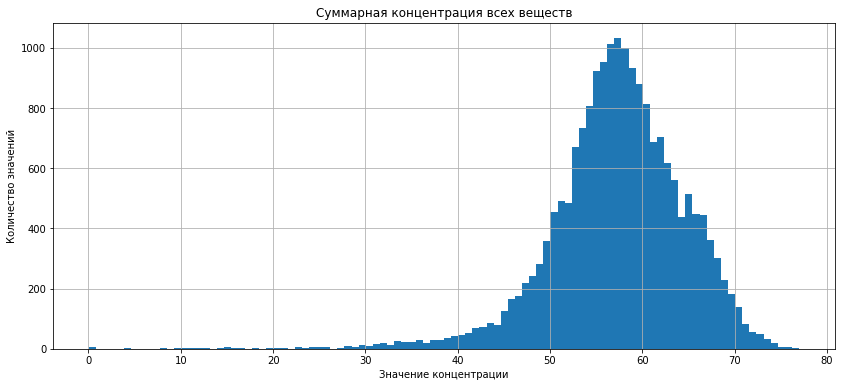

Распределение данных:
  count    19439.000000
mean        57.320789
std          7.212680
min          0.040000
25%         53.557679
50%         57.594391
75%         61.953459
max         76.978947
dtype: float64


In [42]:
sum_concentration_col(data_full,'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol')

- в черновом

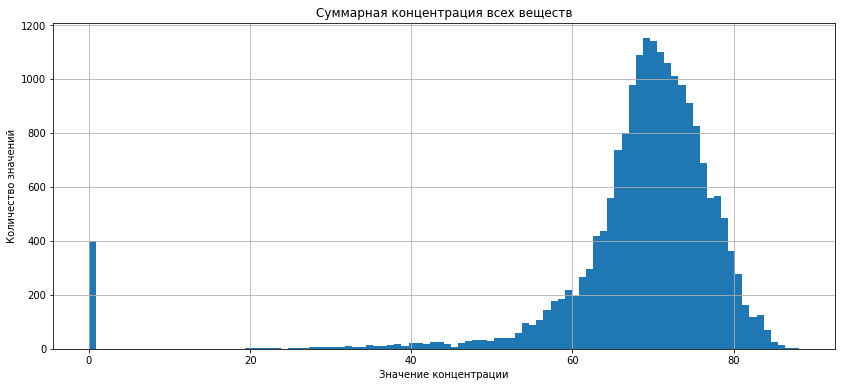

Распределение данных:
  count    19439.000000
mean        68.170865
std         12.491279
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
dtype: float64


In [43]:
sum_concentration_col(data_full,'rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol')


- в финальных концентратах

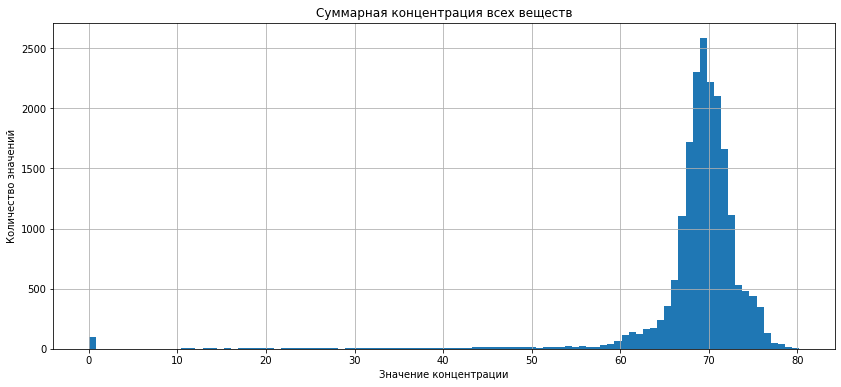

Распределение данных:
  count    19439.000000
mean        68.653624
std          7.427536
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
dtype: float64


In [44]:
sum_concentration_col(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')


Суммарная концентрация по всем этапам обработки имеет нормальное распределение значений, но есть выбивающиеся значения у нулевой отметки, такие значения нам не интересны

Создадим функцию и добавим данные о сумме концентрации в общую таблицу с данными

In [45]:
def sum_concentration_col5(data,concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    ag=data[concentrat_ag]
    au=data[concentrat_au]
    pb=data[concentrat_pb]
    sol=data[concentrat_sol]
    sum_conc=ag+au+pb+sol
    data = sum_conc
    return data

In [46]:
data_full['sum_concentration'] = sum_concentration_col5(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol')


Добавим значения суммы концентраций веществ в выборку data_train

In [47]:
data_mud_conc=data_full[['date','sum_concentration']]
data_train = data_train.merge(data_mud_conc, on='date', how='left')

In [48]:
data_train['sum_concentration'].describe()

count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
Name: sum_concentration, dtype: float64

Добавим значения суммы концентраций веществ в выборку data_test

In [49]:
data_test = data_test.merge(data_mud_conc, on='date', how='left')

In [50]:
data_test['sum_concentration'].describe()

count    5290.000000
mean       69.364422
std         8.372254
min         0.000000
25%        69.342800
50%        70.688587
75%        72.073175
max        79.977670
Name: sum_concentration, dtype: float64

Для удаления аномальных значений концентрации веществ создадим функцию

In [51]:
def concentration_clean(data,sum_concentrat,trashold):
    data=data[data[sum_concentrat] > trashold]
    plt.figure(figsize=(14,6))
    data[sum_concentrat].plot.hist(bins=100)
    plt.title('Cуммарная концентрация всех веществ')
    plt.xlabel('Значение концентрации')
    plt.ylabel('Количество значений')
    plt.grid(True)
    plt.show()
    print('Распределение данных:\n ',data[sum_concentrat].describe())
    return data

Судя по распределению значений стандартного отклонения и среднего значения, мы смело можем поставить порог в 50 для обеспечения более качественного распределения значений.
Удалим данные из полной выборки и посмотрим распределение


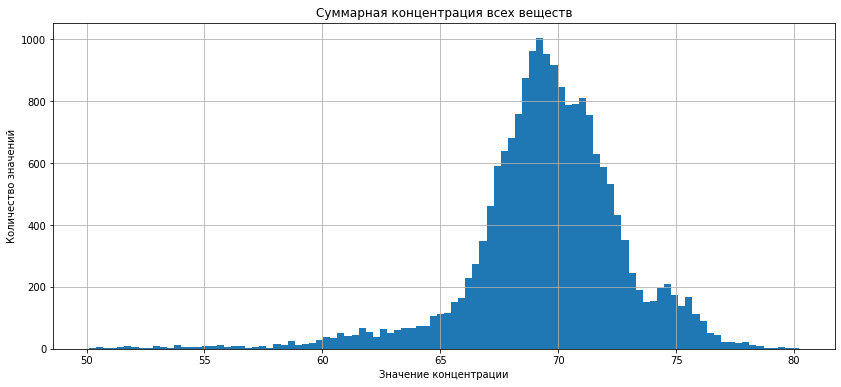

Распределение данных:
  count    19033.000000
mean        69.546324
std          3.311818
min         50.098603
25%         68.056037
50%         69.662138
75%         71.407003
max         80.210644
Name: sum_concentration, dtype: float64


In [52]:
data_full = concentration_clean(data_full,'sum_concentration', 50)

Повторим удаление строк в тренировочной выборке

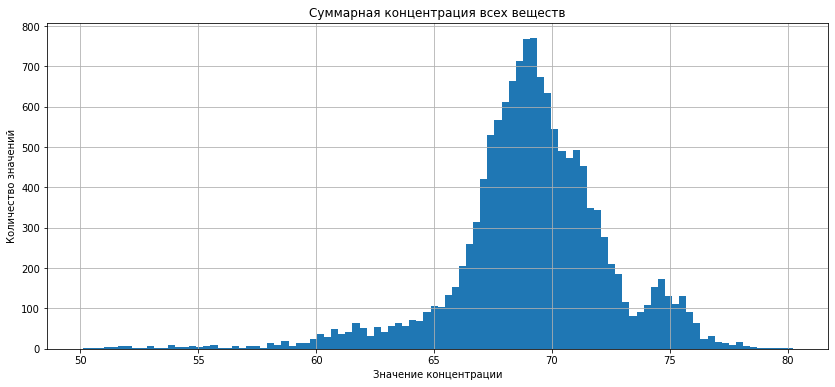

Распределение данных:
  count    13896.000000
mean        69.155362
std          3.359173
min         50.098603
25%         67.674460
50%         69.188746
75%         71.018587
max         80.210644
Name: sum_concentration, dtype: float64


In [53]:
data_train = concentration_clean(data_train,'sum_concentration', 50)

Повторим удаление строк в тестовой выборке

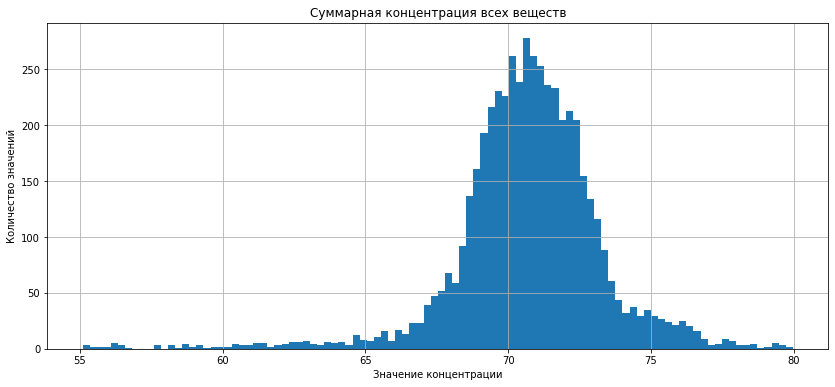

Распределение данных:
  count    5108.000000
mean       70.704453
std         2.613732
min        55.096218
25%        69.489121
50%        70.772160
75%        72.115115
max        79.977670
Name: sum_concentration, dtype: float64


In [54]:
data_test = concentration_clean(data_test,'sum_concentration', 55)

Удалим столбцы из наших выборок для того, чтобы не вызвать переобучение модели

In [55]:
data_train = data_train.drop(['sum_concentration'], axis=1)
print(data_train.shape)

(13896, 55)


In [56]:
data_test = data_test.drop(['sum_concentration'], axis=1)

In [57]:
print(data_test.shape)

(5108, 55)


Посмотрим на распределение данных в целевых столбцах в полной выборке данных

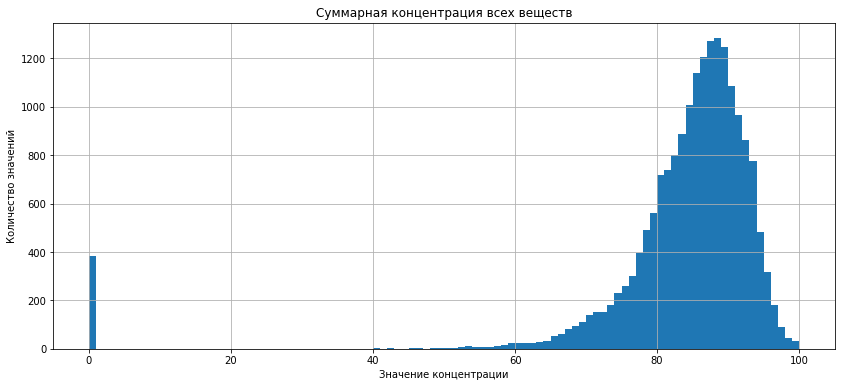

Распределение данных:
  count    19033.000000
mean        83.515919
std         13.963362
min          0.000000
25%         81.168463
50%         86.277219
75%         90.060351
max        100.000000
Name: rougher.output.recovery, dtype: float64


In [58]:
data_full = concentration_clean(data_full,'rougher.output.recovery',-1)

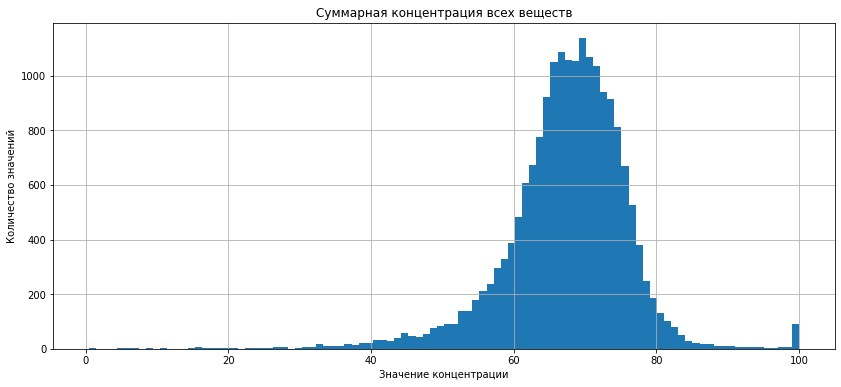

Распределение данных:
  count    19033.000000
mean        67.399266
std          8.729029
min          0.430264
25%         63.437355
50%         68.215611
75%         72.679494
max        100.000000
Name: final.output.recovery, dtype: float64


In [59]:
data_full = concentration_clean(data_full,'final.output.recovery', -1)

Выбираем пороговое значение концентрации в 55 для rougher.output.recovery

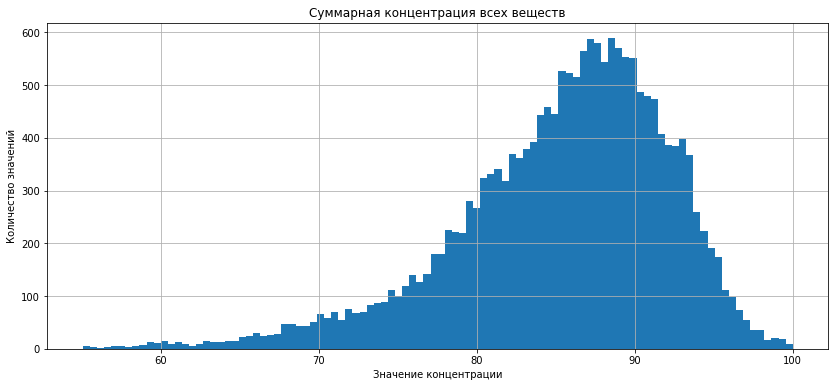

Распределение данных:
  count    18581.000000
mean        85.384050
std          6.784802
min         55.050947
25%         81.630886
50%         86.480850
75%         90.158858
max        100.000000
Name: rougher.output.recovery, dtype: float64


In [60]:
data_full = concentration_clean(data_full,'rougher.output.recovery', 55)

Выбираем пороговое значение концентрации в 35 для final.output.recovery

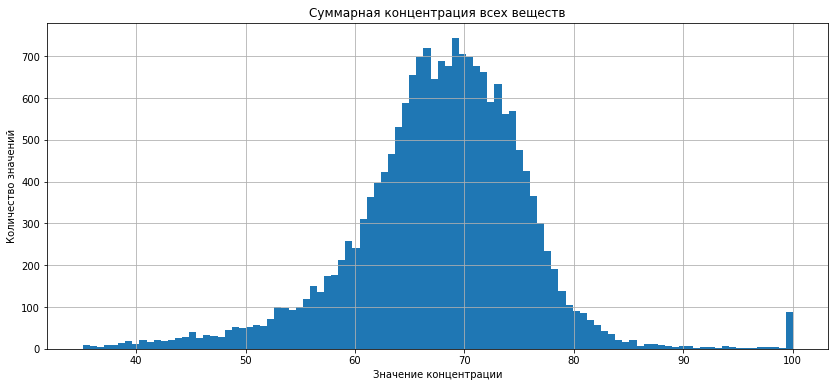

Распределение данных:
  count    18502.000000
mean        67.762431
std          7.966386
min         35.105022
25%         63.709100
50%         68.348554
75%         72.750555
max        100.000000
Name: final.output.recovery, dtype: float64


In [61]:
data_full = concentration_clean(data_full,'final.output.recovery', 35)

Создадим функцию для удаления аномальных и неустраивающих нас строк с даными в целевых столбцах

In [62]:
def concentration_clean2(data,concentrat_1,concentrat_2,trashold,trashold2):
    data=data[data[concentrat_1] > trashold]
    data=data[data[concentrat_2] > trashold2]
    return data

Выполним корректриовку значений в двух других выборках data_train и data_test

Удалим данные из тренировочной выборки

In [63]:
data_train = concentration_clean2(data_train,'rougher.output.recovery','final.output.recovery',55,35)
data_train[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,13470.000000,13470.000000
mean,84.857071,67.213690
std,7.258538,8.318982
min,55.050947,35.105022
25%,80.558872,62.955420
50%,85.648396,67.547893
75%,90.368332,72.409952
max,100.000000,100.000000


Удалим данные из тестовой выборки

In [64]:
data_test = concentration_clean2(data_test,'rougher.output.recovery','final.output.recovery',55,35)
data_test[['rougher.output.recovery','final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,5005.000000,5005.000000
mean,86.978368,69.248823
std,4.724165,6.678996
min,56.179625,38.519412
25%,84.953720,65.900248
50%,87.532575,70.009681
75%,89.827854,73.320629
max,99.169699,100.000000


Вывод
Мы удалили все не вошедшие признаки из тренировочной выборки, так как по факту они абсолютно бесполезны. Если у нас концентрация всех веществ 0, то из такого сырья ничего полезного мы не получим. Такие выбросы могли появиться, из-за сбоя на прозводстве и пр. факторов.

## Модель

Отделим целевые выборки от тренировочных и тестовых данных и присвоим им свои переменные для дальнейшего обучения

Тренировочная выборка

In [65]:
data_train=data_train.drop('date',axis=1)

In [66]:
dt_train_features = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
dt_train_target_r = data_train['rougher.output.recovery']
dt_train_target_f = data_train['final.output.recovery']

Применим масштабирование данных для более качественного обучения моделей на тренировочной выборке

In [67]:
numeric = dt_train_features.columns
scaler_rougher = StandardScaler()
scaler_rougher.fit(dt_train_features[numeric]) 
dt_train_features[numeric] = scaler_rougher.transform(dt_train_features[numeric])

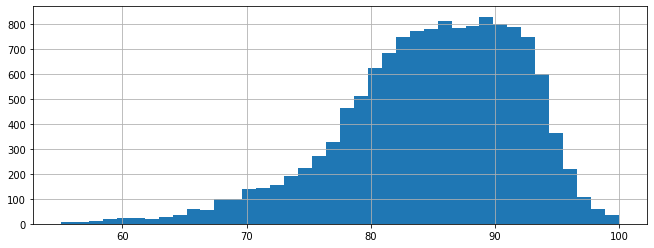

In [68]:
plt.figure(figsize=(11,4))
dt_train_target_r.hist(bins=40)
plt.show()

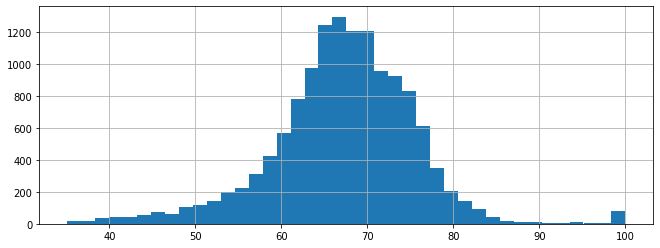

In [69]:
plt.figure(figsize=(11,4))
dt_train_target_f.hist(bins=40)
plt.show()

тестовая выборка

In [70]:
data_test=data_test.drop('date',axis=1)

In [71]:
dt_test_features = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
dt_test_target_r = data_test['rougher.output.recovery']
dt_test_target_f = data_test['final.output.recovery']

Применим масштабирование данных для более качественного обучения моделей на тестовой выборке

In [72]:
numerict = dt_test_features.columns

dt_test_features[numeric] = scaler_rougher.transform(dt_test_features[numerict])

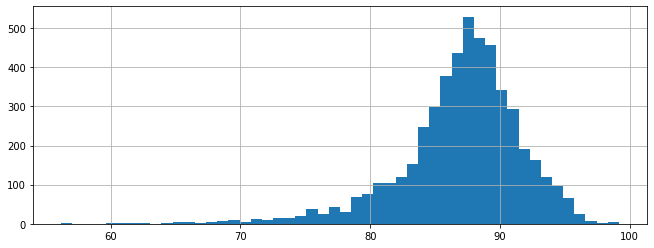

In [73]:
plt.figure(figsize=(11,4))
dt_test_target_r.hist(bins=50)
plt.show()

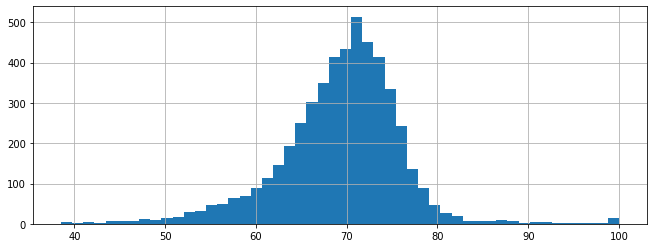

In [74]:
plt.figure(figsize=(11,4))
dt_test_target_f.hist(bins=50)
plt.show()

Напишем функцию для вычисления итоговой sMAPE

In [75]:
def sMAPE(y, y_pred):
    results = abs(y - y_pred) / ((abs(y) + abs(y_pred)) / 2)
    return -1*((results.sum() / len(results)) * 100).round(2)

In [76]:
sMAPE(target_dt,predict_dt)

-0.0

Итоговое sMAPE

In [77]:
def fin_smape2(rougher,final):
    fin_smape = (0.25*rougher)+(0.75*final)
    return fin_smape.round(2)

Создадим константную модель и проверим значение sMAPE на её данных

rougher.output.recovery

In [78]:
model_const_r=DummyRegressor(strategy="median")
model_const_r.fit(dt_train_features,dt_train_target_r)
predict_const_model_r=cross_val_score(model_const_r,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False)).mean()
predict_const_model_r.round(2)

7.4

final.output.recovery

In [79]:
model_const_f=DummyRegressor(strategy="median")
model_const_f.fit(dt_train_features,dt_train_target_f)

predict_const_model_f =cross_val_score(model_const_f,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False)).mean()
predict_const_model_f.round(2)

9.57

Проверим результат

Вычислим итоговое значение sMAPE константной модели

In [80]:
const_model_smape = fin_smape2(predict_const_model_r,predict_const_model_f)
print('Итоговое значение sMAPE константной модели: ', const_model_smape)

Итоговое значение sMAPE константной модели:  9.03


Константная модель создана. Теперь проверим качество предсказания наших моделей

Обучим разные модели и оценим их качество кросс-валидацией

Дерево решений

Создадим функцию для проверки качества модели на кросс-валидации

In [81]:
def cross_validat(model):
    score_val = (cross_val_score(model, dt_train_features, dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для `rougher`: ',-1*score_val.round(2))

    
    score_val_f = (cross_val_score(model, dt_train_features, dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True))).mean() 
    print('Cреднее значение sMAPE для `final`: ',-1*score_val_f.round(2))

    fin_score_smape= fin_smape2(score_val,score_val_f)
    print('Итоговое sMAPE модели на кросс-валидации: ',-1*fin_score_smape.round(2)) 

Оценим модель методом кросс-валидации при помощи нашей функции

In [82]:
cross_validat(DecisionTreeRegressor(random_state=12345))

Cреднее значение sMAPE для `rougher`:  8.21
Cреднее значение sMAPE для `final`:  15.38
Итоговое sMAPE модели на кросс-валидации:  13.58


Подберём параметры для модели Дерево решений при помощи цикла for

rougher.output.recovery

In [83]:
best_model = None
best_result_r = 100
best_depth = 0
for depth in tqdm(range(1, 13)):
    model_dr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    #model.fit(dt_train_features,dt_train_target_r) 
   # predictions_valid_r = model.predict(dt_train_features) 
    result = -1*cross_val_score(model_dr,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
    #result = -1*sMAPE(dt_train_target_r,predictions_valid_r)
    if result < best_result_r:
        best_model = model_dr
        best_result_r = result.round(2)
        best_depth = depth

print("Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`:", best_result_r, "\nКоличество деревьев:", best_depth)

  0%|          | 0/12 [00:00<?, ?it/s]

Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`: 6.65 
Количество деревьев: 4


final.output.recovery

In [84]:
best_model = None
best_result_f = 100
best_depth_f = 0
for depth in tqdm(range(1, 13)):
    model_d = DecisionTreeRegressor(random_state=12345, max_depth=depth)
  
    result = -1*cross_val_score(model_d,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
    if result < best_result_f:
        best_model = model_d
        best_result_f = result.round(2)
        best_depth_f = depth

print("Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`:", best_result_f, "\nКоличество деревьев:", best_depth_f)

  0%|          | 0/12 [00:00<?, ?it/s]

Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`: 8.7 
Количество деревьев: 1


Итоговое значение sMAPE модели Дерева решений

In [85]:
fin_score_dtf = fin_smape2(best_result_r,best_result_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе циклом `for`: ', fin_score_dtf )

Итоговое значение sMAPE модели Дерева решений при подборе циклом `for`:  8.19


Подберём параметры для модели Дерева решений при помощи GridSearchCV

rougher.output.recovery

In [86]:
parametrs_r = { 'max_depth': range (1,13) }
model_d = DecisionTreeRegressor(random_state=12345)  
grid_r = GridSearchCV(model_d, parametrs_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_r.fit(dt_train_features, dt_train_target_r)
best_score_r = grid_r.best_score_
parametrs_r_gs = pd.Series(grid_r.best_params_)[0]
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(best_score_r), '\nМаксимальная глубина:',parametrs_r_gs)

Для целевого признака `rougher.output.recovery` значение sMAPE равно: 8.52 
Максимальная глубина: 12


final.output.recovery

In [87]:
parametrs_f = {'max_depth': range (1,13)}
model_df = DecisionTreeRegressor(random_state=12345)         
grid_r = GridSearchCV(model_df, parametrs_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_r.fit(dt_train_features, dt_train_target_f)
parametrs_f_gs=pd.Series(grid_r.best_params_)[0]
best_score_f = -1*grid_r.best_score_
print('Для целевого признака `final.output.recovery` значение sMAPE равно: {:.2f}'.format(best_score_f), '\nМаксимальная глубина:',parametrs_f_gs)

Для целевого признака `final.output.recovery` значение sMAPE равно: 13.86 
Максимальная глубина: 11


Итоговое значение sMAPE модели Дерева решений

In [88]:
fin_score_dt= fin_smape2(best_score_r,best_score_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV: ',fin_score_dt) 

Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV:  12.53


# Cлучайный лес регрессии

Оценим модель методом кросс-валидации при помощи нашей функции

In [89]:
cross_validat(RandomForestRegressor(random_state=12345))

Cреднее значение sMAPE для `rougher`:  6.51
Cреднее значение sMAPE для `final`:  8.66
Итоговое sMAPE модели на кросс-валидации:  8.12


Подберём параметры для модели Случайный лес при помощи GridSearchCV

rougher.output.recovery

In [90]:
parametrs = { 'n_estimators': range (1, 10, 2),
              'max_depth': range (1, 13, 2)}

In [91]:
model_rf = RandomForestRegressor(random_state=12345)
grid_rf = GridSearchCV(model_rf, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_rf.fit(dt_train_features, dt_train_target_r)

best_score_rf = -1*grid_rf.best_score_

parametrs_r_gs_d=pd.Series(grid_rf.best_params_)[0]
parametrs_r_gs_n=pd.Series(grid_rf.best_params_)[1]
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'. format(best_score_rf), '\nМаксимальная глубина:',parametrs_r_gs_d, '\nКоличество деревьев:',parametrs_r_gs_n)


Для целевого признака `rougher.output.recovery` значение sMAPE равно: 6.18 
Максимальная глубина: 5 
Количество деревьев: 9


final.output.recovery

In [92]:
model_rff = RandomForestRegressor(random_state=12345)
grid_rff = GridSearchCV(model_rff, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_rff.fit(dt_train_features, dt_train_target_f)
result_gs_f= grid_rff.best_score_

parametrs_f_gs_d=pd.Series(grid_rff.best_params_)[0]
parametrs_f_gs_n=pd.Series(grid_rff.best_params_)[1]
print('Для целевого признака `final.output.recovery` значение sMAPE равно: {:.2f}'.format(result_gs_f), '\nМаксимальная глубина:',parametrs_f_gs_d, '\nКоличество деревьев:',parametrs_f_gs_n)


Для целевого признака `final.output.recovery` значение sMAPE равно: 8.19 
Максимальная глубина: 5 
Количество деревьев: 9


In [93]:
fin_score_rf= fin_smape2(best_score_rf,result_gs_f)
print('Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV: ',fin_score_rf) 

Итоговое значение sMAPE модели Дерева решений при подборе параметров методом GridSearchCV:  7.69


Подберём параметры для модели Случайный лес при помощи цикла for

rougher.output.recovery

In [94]:
best_model = None
best_result_r = 100
best_est_r = 0
best_depth_r = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13,2), desc='depth loop', leave=False):
        model_rf = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)

        result_rf = -1*cross_val_score(model_rf,dt_train_features,dt_train_target_r, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean()
     

        if result_rf < best_result_r:
            best_model = model_rf
            best_result_r = result_rf
            best_est_r = est
            best_depth_r = depth

print("Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`:", best_result_r.round(2), "\nКоличество деревьев:", best_est_r, "\nМаксимальная глубина:", best_depth_r)


  0%|          | 0/5 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

Значение sMAPE наилучшей модели для целевого признака `rougher.output.recovery`: 6.18 
Количество деревьев: 9 
Максимальная глубина: 5


final.output.recovery

In [95]:
best_model = None
best_result_f = 100
best_est_f = 0
best_depth_f = 0
for est in tqdm(range(1,10, 2)):
    for depth in tqdm(range (1,13, 2), desc='depth loop', leave=False):
        model_rff = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
    
        result_rf = -1*cross_val_score(model_rff,dt_train_features,dt_train_target_f, cv=5, scoring=make_scorer(sMAPE, greater_is_better=True)).mean() 
        if result_rf < best_result_f:
            best_model = model_rff
            best_result_f = result_rf
            best_est_f = est
            best_depth_f = depth

print("Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`:", best_result_f.round(2), "\nКоличество деревьев:", best_est_f, "\nМаксимальная глубина:", best_depth_f)


  0%|          | 0/5 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

depth loop:   0%|          | 0/6 [00:00<?, ?it/s]

Значение sMAPE наилучшей модели для целевого признака `final.output.recovery`: 8.19 
Количество деревьев: 9 
Максимальная глубина: 5


In [96]:
fin_score_rff =fin_smape2(best_result_r,best_result_f)
print('Итоговое значение sMAPE модели Случайный лес при подборе циклом `for`: ',fin_score_rff.round(2)) 

Итоговое значение sMAPE модели Случайный лес при подборе циклом `for`:  7.69


Линейная регрессия

Оценим модель методом кросс-валидации при помощи нашей функции

In [97]:
cross_validat(LinearRegression())

Cреднее значение sMAPE для `rougher`:  6.66
Cреднее значение sMAPE для `final`:  9.88
Итоговое sMAPE модели на кросс-валидации:  9.07


Подберём параметры для модели Линейная регрессия при помощи GridSearchCV

rougher.output.recovery

In [98]:
parametrs = { 'fit_intercept': [True],
              'normalize': [True, False]}

In [99]:
model_lr_r = LinearRegression()
grid_lr_r = GridSearchCV(model_lr_r, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_lr_r.fit(dt_train_features, dt_train_target_r)

fit_intercept_r=pd.Series(grid_lr_r.best_params_)[0]
normalize_r=pd.Series(grid_lr_r.best_params_)[1]

result_lr_r = grid_lr_r.best_score_
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(result_lr_r), '\nfit_intercept:',fit_intercept_r, '\nnormalize:',normalize_r)


Для целевого признака `rougher.output.recovery` значение sMAPE равно: 6.66 
fit_intercept: True 
normalize: True


final.output.recovery

In [100]:
%%time
model_lr_f = LinearRegression()
grid_lr_f = GridSearchCV(model_lr_f, parametrs, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
grid_lr_f.fit(dt_train_features, dt_train_target_f)

fit_intercept_f = pd.Series(grid_lr_f.best_params_)[0]
normalize_f = pd.Series(grid_lr_f.best_params_)[1]
result_lr_f=grid_lr_f.best_score_
print('Для целевого признака `rougher.output.recovery` значение sMAPE равно: {:.2f}'.format(result_lr_f), '\nfit_intercept:',fit_intercept_f, '\nnormalize:',normalize_f)


Для целевого признака `rougher.output.recovery` значение sMAPE равно: 9.88 
fit_intercept: True 
normalize: True
CPU times: user 1.05 s, sys: 2.77 s, total: 3.82 s
Wall time: 3.88 s


In [101]:
fin_score_lr= fin_smape2(result_lr_r,result_lr_f)
print('Итоговое значение sMAPE модели Линейная регрессия: ',fin_score_lr) 

Итоговое значение sMAPE модели Линейная регрессия:  9.07


Выберем лучшую модель и проверим её на тестовой выборке

Т.к. модель Случайный лес показала наилудшие показатели значения sMAPE при подборе гиперпараметров и оценке её методом кросс-валидации, предсказания и проверку на тестовой выборке будем строить на ней. Так же мы рассмотрим вторую по показателям расчёта гиперпапарметров модель - Линейная регрессия, у неёпоказатели оценки модели на кросс-валидации не на много отстают от модели Случайный лес.

Случайный лес

rougher.output.recovery

In [102]:
model_rf_test_r = RandomForestRegressor(random_state=12345, n_estimators=best_est_r, max_depth=best_depth_r)
model_rf_test_r.fit(dt_train_features, dt_train_target_r) 
predictions_test_rf_r = model_rf_test_r.predict(dt_test_features)
result_rf_test_r = -1*sMAPE(dt_test_target_r,predictions_test_rf_r)
result_rf_test_r

4.06

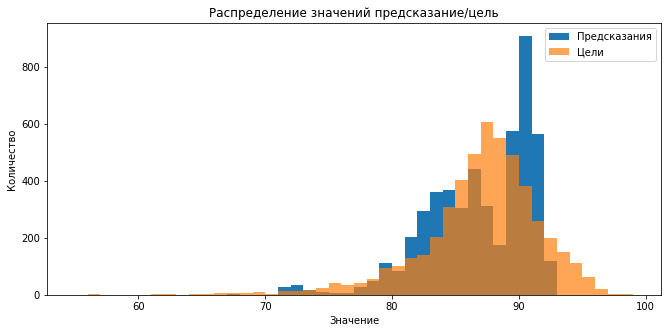

In [103]:
plt.figure(figsize=(11,5))
pd.Series(predictions_test_rf_r).plot(kind='hist', bins=range(55,100))
pd.Series(dt_test_target_r).plot(kind='hist', bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

final.output.recovery

In [104]:
model_rf_test_f = RandomForestRegressor(random_state=12345, n_estimators=best_est_f, max_depth=best_depth_f)
model_rf_test_f.fit(dt_train_features, dt_train_target_f) 
predictions_test_rf_f = model_rf_test_f.predict(dt_test_features)
result_rf_test_f = -1*sMAPE(dt_test_target_f,predictions_test_rf_f)
result_rf_test_f

8.02

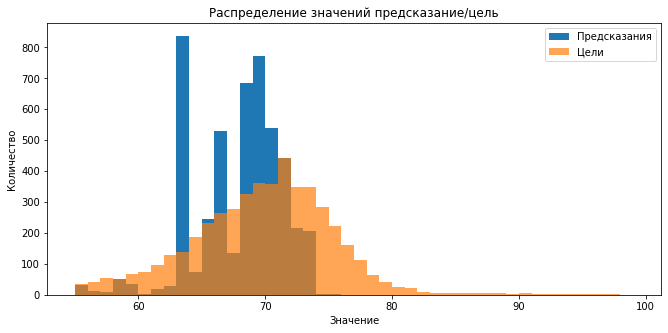

In [105]:
plt.figure(figsize=(11,5))
pd.Series(predictions_test_rf_f).plot(kind='hist', bins=range(55,100), alpha=1)
pd.Series(dt_test_target_f).plot(kind='hist', bins=range(55,100), alpha= 0.7)
plt.legend(['Предсказания','Цели'])
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

Итоговое значение sMAPE модели Случайный лес на тестовой выборке

In [106]:
fin_score_test_rf = fin_smape2(result_rf_test_r, result_rf_test_f)
print('Итоговое значение sMAPE модели Случайный лес: ', fin_score_test_rf) 

Итоговое значение sMAPE модели Случайный лес:  7.03


Проверим результат при помощи Константной модели

Константная модель

In [107]:
predict_const_model_rt = model_const_r.predict(dt_test_features)
result_lr_const_rt = -1*sMAPE(dt_test_target_r,predict_const_model_rt)
result_lr_const_rt

4.4

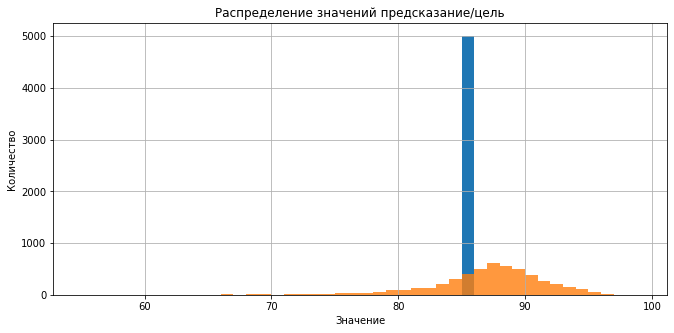

In [108]:
plt.figure(figsize=(11,5))
pd.Series(predict_const_model_rt).hist(bins=range(55,100))
pd.Series(dt_test_target_r).hist(alpha=0.8, bins=range(55,100))
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

In [109]:
predict_const_model_ft = model_const_f.predict(dt_test_features)
result_lr_const_ft = -1*sMAPE(dt_test_target_f,predict_const_model_ft)
result_lr_const_ft

7.73

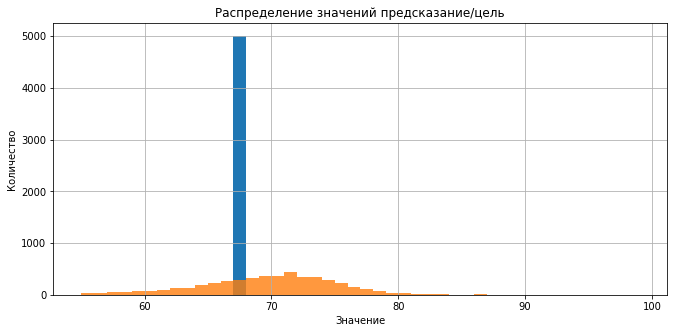

In [110]:
plt.figure(figsize=(11,5))
pd.Series(predict_const_model_ft).hist(bins=range(55,100))
pd.Series(dt_test_target_f).hist(alpha=0.8, bins=range(55,100))
plt.title('Распределение значений предсказание/цель')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

Итоговое значение sMAPE константной модели на тестовой выборке

In [111]:
const_fin=fin_smape2(result_lr_const_rt,result_lr_const_ft)
print('Итоговое значение sMAPE константной модели: ',const_fin) 

Итоговое значение sMAPE константной модели:  6.9


Для подведения итогового сравнения значений sMAPE на тестовых данных сведём их в таблицу

In [112]:
column=['Итоговое значение sMAPE']
comparison_tabl = pd.DataFrame(index=['Случайный лес','Константная модель'], columns=['Итоговое значение sMAPE'])
comparison_tabl['Итоговое значение sMAPE'] = fin_score_test_rf,const_fin

comparison_tabl.style.highlight_min(color='yellowgreen',subset=column).highlight_null(null_color='lightgrey').highlight_max(color='coral',subset=column)


,Итоговое значение sMAPE
Случайный лес,7.030000
Константная модель,6.900000


In [113]:
print('Отставание в результатах предсказания составляет: {:.2%} от константной модели '. format(abs(6.9/7.03-1)))

Отставание в результатах предсказания составляет: 1.85% от константной модели 


Вывод
При сравнении с константной моделью качество предсказания незначительно отстаёт на значение sMAPE в 0,04(1,85%) , но по плотности распределения значений на графиках видно, что предсказания модели более качественные, т.к. идёт большее перекрытие значений по спектру возможных значений, в отличии от константной.

# Вывод


Была проведена большая работа по обработке и анализу данных по результату которых мы выяснили какие данные нам требуется определить в результате обработки данных, а какие данные не должны попадать в обучение модели. К тому же скорректировали и распределение значений во всех выборках выбрав минимальное пороговое значение.
Перед нами стояла не лёгкая задача по определению наилучшей модели, предсказания которой, должны уложиться ниже константной модели, которая в свою очередь предсказвает только одно медианное значение. Для этого мы выбирали модели при помощи кросс-валидации и подбирали гиперпараметры двумя способами:
- подбором при помощи GridSearchCV
- и циклом for
В результате с незначительным отрывом в 0,04 sMAPE(1,85%),по отношению к двум моделям: Линейная регрессии и Случайный лес, лидировала Константной модель, но по плотности распределения значений на графиках видно, что предсказания наших обученных моделей более качественные, т.к. идёт большее перекрытие правильно угаданных значений.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке